In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Lessons learned
* Make notes on classic EDA stuff
 * grouping and aggregating
 * summary statistics
 * basic plots
 * correlations

How to improve the data
* good column names from the start
* no unnecessary whitespace
* sensible group names

# Diagnostic plots

In [21]:
log = pd.read_csv('log_4_6_20180828_14_05_29.csv', sep=',')

### Accept + move type statistics

In [22]:
log['accept'].value_counts()

0.0    3442236
1.0     396151
Name: accept, dtype: int64

In [23]:
log['type'].value_counts()

D    1335261
M    1333552
B    1331187
Name: type, dtype: int64

In [24]:
log.groupby('accept')['type'].value_counts()

accept  type
0.0     M       1213739
        D       1184878
        B       1043619
1.0     B        150551
        D        150383
        M         95217
Name: type, dtype: int64

### Convergence

In [25]:
log['time'] = log['time'].replace(math.nan,'',regex=True)
log['time'] = pd.to_numeric(log['time'])

In [30]:
block_length = 40000
groupby_blocks = np.repeat(range(int(len(log)/block_length)),block_length)
groupby_blocks = np.array([0] + list(groupby_blocks+1))[0:-1]

In [31]:
groupedlog = log.groupby([groupby_blocks, 'type'])['accept'].sum().reset_index()

In [32]:
groupedmeanlog = log.groupby([groupby_blocks])['energy','no_act_vrt','time'].mean().reset_index()

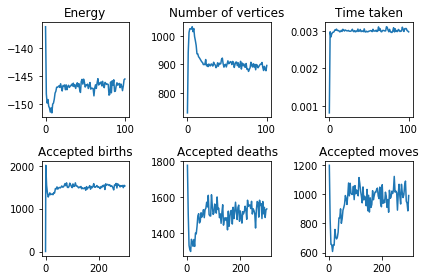

In [33]:

plt.subplot(2,3,1)
plt.title('Energy')
groupedmeanlog['energy'].plot()

plt.subplot(2,3,2)
plt.title('Number of vertices')
groupedmeanlog['no_act_vrt'].plot()

plt.subplot(2,3,3)
plt.title('Time taken')
groupedmeanlog['time'].plot()

plt.subplot(2,3,4)
plt.title('Accepted births')
groupedlog[groupedlog['type'] == 'B']['accept'].plot()

plt.subplot(2,3,5)
plt.title('Accepted deaths')
groupedlog[groupedlog['type'] == 'D']['accept'].plot()

plt.subplot(2,3,6)
plt.title('Accepted moves')
groupedlog[groupedlog['type'] == 'M']['accept'].plot()


plt.tight_layout()
# plt.show()

plt.savefig('foo.pdf')

In [34]:
log['energy'] - log['energy_after']

0            0.089
1         -135.178
2         -135.178
3         -135.178
4         -135.178
5            0.130
6         -135.308
7         -135.308
8            0.065
9         -135.373
10        -135.373
11        -135.373
12           0.088
13        -135.461
14          -0.035
15        -135.426
16           0.076
17        -135.426
18           0.080
19        -135.506
20           0.081
21        -135.506
22           0.072
23           0.080
24        -135.658
25        -135.658
26        -135.658
27        -135.658
28        -135.658
29           0.084
            ...   
3999970        NaN
3999971   -145.097
3999972   -145.097
3999973   -145.097
3999974   -145.097
3999975   -145.097
3999976   -145.097
3999977   -145.097
3999978   -145.097
3999979   -145.097
3999980   -145.097
3999981   -145.097
3999982   -145.097
3999983   -145.097
3999984   -145.097
3999985   -145.097
3999986   -145.097
3999987   -145.097
3999988   -145.097
3999989   -145.097
3999990   -145.097
3999991   -1

### Checking if the energy does not move by itself

In [89]:
lognona = log[~log.isnull().any(axis=1)]
logshift = lognona.assign(shiftenergy = lognona['energy'].shift(-1))

In [90]:
logshift[(logshift['shiftenergy'] - logshift['energy'] != 0) & (logshift['accept'] != 1)]

,step_no,type,pt,pt_mv,energy,energy_after,b,ratio,accept,no_vrt,no_act_vrt,time,shiftenergy
1999999,2000000,B,0.260079 0.576914 0.170576 0.0041291,,145.211,-1.0,0.762074,0.511364,0.0,6142.0,871.0,0.002197,NaN


# Cell data distributions

In [161]:
cell_data = pd.read_csv('cell_data_3_6_20180829_13_17_56.txt', sep=';')

In [162]:
cell_data

,epsilon,alpha,theta,z,max_weight,energy,tetra_volume,tetra_circum,face_surf,edge_length,...,point_degree,cells,vertices,removable,epsilon_est,face_est,alpha_est,theta_est,z_est,theta_known_z_est
0,0.001,0.1,0.5,500,0.01,72.1249,"[0.000189093, 0.000237901, 0.000253548, 0.0002...","[0.0910455, 0.0894309, 0.0873513, 0.0922598, 0...","[0.00739038, 0.00313651, 0.0069441, 0.00872971...","[0.111111, 0.0954673, 0.157135, 0.157135, 0.14...",...,"[12, 17, 8, 15, 15, 12, 16, 15, 15, 20, 14, 15...",5306,856,122,0.026439,0.001003,0.099988,0.546569,126.971,12.9585


In [163]:
cell_data.tetra_volume[0]

'[0.000189093, 0.000237901, 0.000253548, 0.000298129, 0.00024246, 0.000209411, 0.000213052, 0.000225454, 0.000232066, 0.000143963, 0.000103952, 0.000164856, 0.000141226, 0.000173099, 0.000191981, 0.00038002, 0.000183362, 0.000409428, 0.000372487, 0.000113353, 8.51026e-05, 0.00020813, 0.000178557, 0.000143095, 7.54922e-05, 0.000253123, 0.000330314, 0.00015148, 0.000175607, 0.000300022, 0.000285245, 0.000245581, 0.00033894, 0.000321996, 9.52713e-05, 0.000277387, 0.000232222, 0.000280268, 5.38818e-05, 4.50118e-05, 0.000334707, 0.000114537, 0.000134037, 8.56786e-05, 0.000274541, 4.34385e-05, 0.000287742, 8.13906e-05, 0.000108817, 0.000134431, 0.000132393, 0.000147677, 0.000275138, 0.000125929, 8.07251e-05, 0.000287265, 0.000159846, 0.000319596, 0.000267346, 7.19328e-05, 0.000226907, 0.000313729, 0.000352702, 0.000310343, 0.000236726, 9.05538e-05, 0.000329309, 0.000228214, 0.000138587, 0.000216014, 0.00018418, 0.000197403, 0.000153903, 0.000128537, 0.000292581, 0.000313137, 0.000306925, 0.0

In [164]:
def listify(string):
        strlist = string[1:-2].replace(' ','').split(',')[:-1]
        result = [float(num) for num in strlist]
        return(result)

In [165]:
volumes = listify(cell_data.tetra_volume[0])

In [166]:
print(np.mean(volumes), np.std(volumes))

0.0001917242211873351 9.34343766297253e-05


In [167]:
bins = np.linspace(0,0.0005,30)

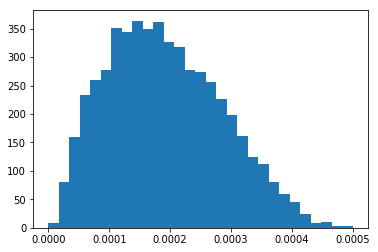

In [168]:
plt.hist(volumes,bins)
plt.show()

---

In [169]:
cell_data_neg = pd.read_csv('cell_data_3_6_20180829_13_17_31.txt', sep=';')

In [170]:
cell_data_neg

,epsilon,alpha,theta,z,max_weight,energy,tetra_volume,tetra_circum,face_surf,edge_length,...,point_degree,cells,vertices,removable,epsilon_est,face_est,alpha_est,theta_est,z_est,theta_known_z_est
0,0.001,0.1,-10,500,0.01,-1551.09,"[8.06085e-05, 0.000244124, 0.000259956, 0.0002...","[0.0654285, 0.0936958, 0.0852047, 0.0887693, 0...","[0.00872971, 0.00872971, 0.00908933, 0.0118253...","[0.111111, 0.118971, 0.157135, 0.149755, 0.158...",...,"[15, 11, 11, 16, 15, 16, 13, 19, 15, 9, 14, 21...",6100,956,205,0.025293,0.001003,0.099958,-9.11282,128.561,4.63984


In [171]:
len(listify(cell_data_neg.tetra_circum[0]))

6100

In [172]:
len(listify(cell_data_neg.point_degree[0]))

956

### Volumes

In [173]:
volumes_neg = listify(cell_data_neg.tetra_volume[0])

In [174]:
len(volumes)

5306

In [175]:
print(np.mean(volumes_neg), np.std(volumes_neg))

0.00016776502518524593 8.724211810841796e-05


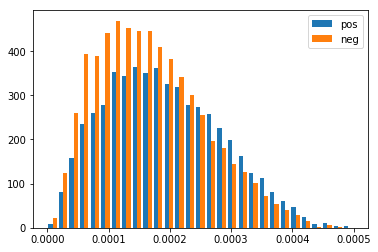

In [176]:
plt.hist([volumes,volumes_neg],bins, label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()

### Circumradius

In [177]:
circum = listify(cell_data.tetra_circum[0])
circum_neg = listify(cell_data_neg.tetra_circum[0])

In [178]:
bins_circum = np.linspace(0.03,0.1,50)

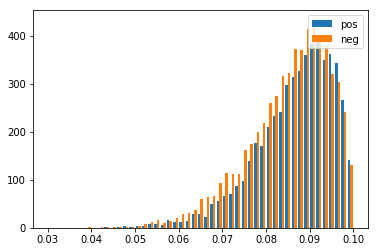

In [179]:
plt.hist([circum,circum_neg],bins_circum, label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()

### Face surface

In [180]:
surf = listify(cell_data.face_surf[0])
surf_neg = listify(cell_data_neg.face_surf[0])

In [181]:
bins_surf = np.linspace(0.0004,0.013,30)

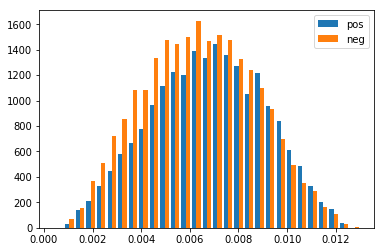

In [182]:
plt.hist([surf,surf_neg],bins_surf, label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()

### Edge length

In [183]:
length = listify(cell_data.edge_length[0])
length_neg = listify(cell_data_neg.edge_length[0])

In [184]:
bins_length = np.linspace(0.01,0.2,30)

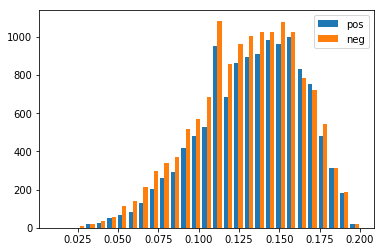

In [185]:
plt.hist([length,length_neg],bins_length, label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()

### Point degree

In [186]:
deg = listify(cell_data.point_degree[0])
deg_neg =  listify(cell_data_neg.point_degree[0])

In [187]:
bins_deg = np.linspace(0,30,30)

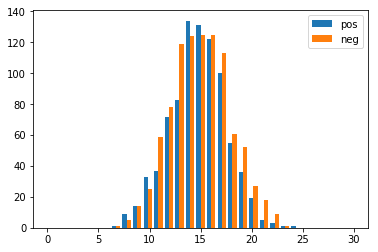

In [188]:
plt.hist([deg,deg_neg],bins_deg, label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()